In [2]:
library(Stat2Data)
library(lattice)
library(stats)
library(gridExtra)

In [9]:
data(NFL2007Standings)

In [11]:
nfl = NFL2007Standings
head(nfl)

Team,Conference,Division,Wins,Losses,WinPct,PointsFor,PointsAgainst,NetPts,TDs
New England Patriots,AFC,ACE,16,0,1.000,589,274,315,75
Dallas Cowboys,NFC,NCE,13,3,0.813,455,325,130,54
Green Bay Packers,NFC,NCN,13,3,0.813,435,291,144,49
Indianapolis Colts,AFC,ACS,13,3,0.813,450,262,188,54
Jacksonville Jaguars,AFC,ACS,11,5,0.688,411,304,107,50
San Diego Chargers,AFC,ACW,11,5,0.688,412,284,128,49


In [14]:
plotPointsFor = xyplot(nfl$WinPct ~ nfl$PointsFor, type=c("p", "r"))

In [15]:
plotPointsAgainst = xyplot(nfl$WinPct ~ nfl$PointsAgainst, type=c('p', 'r'))

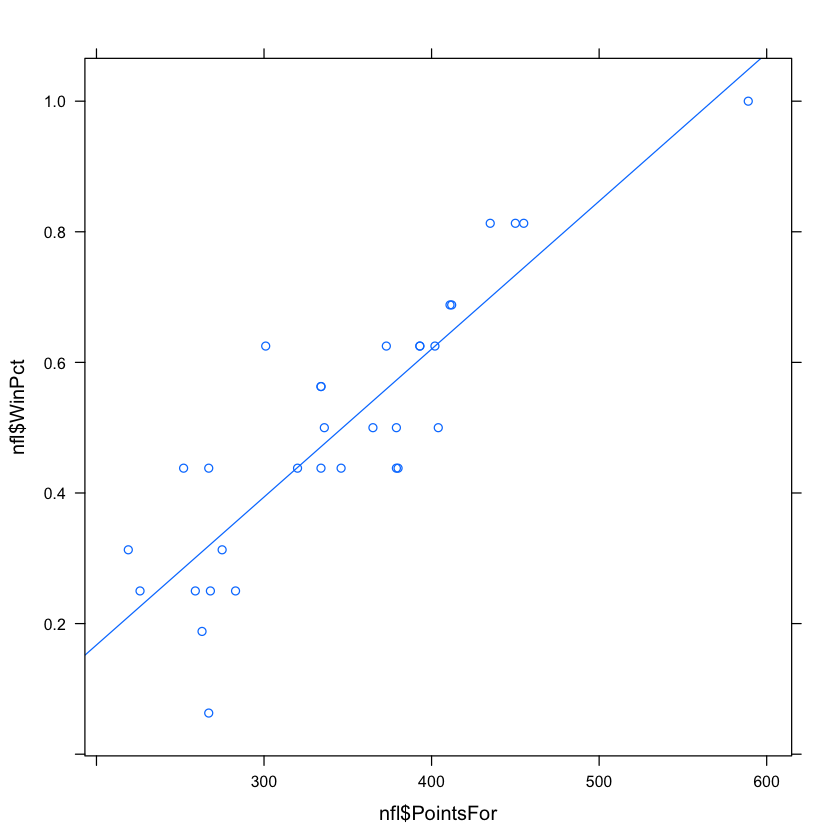

In [17]:
plotPointsFor

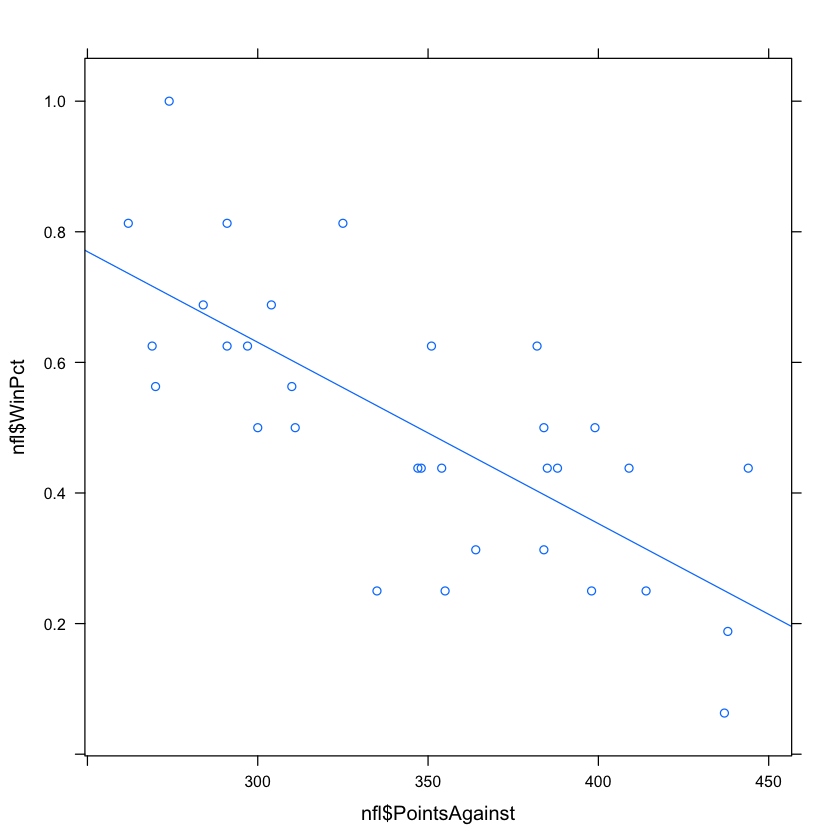

In [18]:
plotPointsAgainst

In [20]:
pointsForLm = lm(nfl$WinPct ~ nfl$PointsFor)
pointsForLm


Call:
lm(formula = nfl$WinPct ~ nfl$PointsFor)

Coefficients:
  (Intercept)  nfl$PointsFor  
    -0.285859       0.002266  


In [23]:
summary(pointsForLm)


Call:
lm(formula = nfl$WinPct ~ nfl$PointsFor)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25604 -0.06284  0.01031  0.07087  0.22893 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.2858587  0.0823619  -3.471   0.0016 ** 
nfl$PointsFor  0.0022655  0.0002315   9.787 7.53e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.103 on 30 degrees of freedom
Multiple R-squared:  0.7615,	Adjusted R-squared:  0.7536 
F-statistic: 95.79 on 1 and 30 DF,  p-value: 7.53e-11


In [24]:
pointsAgainstLm = lm(nfl$WinPct ~ nfl$PointsAgainst)

In [25]:
summary(pointsAgainstLm)


Call:
lm(formula = nfl$WinPct ~ nfl$PointsAgainst)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.28360 -0.09396 -0.03540  0.10431  0.29702 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.4637846  0.1680667   8.710 1.03e-09 ***
nfl$PointsAgainst -0.0027767  0.0004787  -5.801 2.44e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1449 on 30 degrees of freedom
Multiple R-squared:  0.5287,	Adjusted R-squared:  0.5129 
F-statistic: 33.65 on 1 and 30 DF,  p-value: 2.437e-06


In [26]:
# Prediction interval for win pct based on PointsAgainst
# ~ y_hat +- 2 * RSE

In [27]:
diff = 1.96 * .1449

In [28]:
prediction = 1.46 - .0027767 * 364

In [29]:
lwr = prediction - diff
uppr = prediction + diff

In [31]:
paste("Prediction interval for win percentage based on PointsAgainst", lwr, " ", uppr)

[1] "Prediction interval for win percentage based on PointsAgainst 0.1652772   0.7332852"

In [32]:
cor(nfl$PointsFor, nfl$PointsAgainst)

[1] -0.4810621

In [38]:
pfAndPaLm = lm(nfl$WinPct ~ nfl$PointsFor + nfl$PointsAgainst)

In [39]:
summary(pfAndPaLm)


Call:
lm(formula = nfl$WinPct ~ nfl$PointsFor + nfl$PointsAgainst)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.15857 -0.05318 -0.01259  0.07360  0.12962 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.4172230  0.1394480   2.992  0.00561 ** 
nfl$PointsFor      0.0017662  0.0001870   9.445 2.37e-10 ***
nfl$PointsAgainst -0.0015268  0.0002751  -5.551 5.50e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07298 on 29 degrees of freedom
Multiple R-squared:  0.8844,	Adjusted R-squared:  0.8764 
F-statistic: 110.9 on 2 and 29 DF,  p-value: 2.598e-14


In [41]:
prediction = .4172230 + .0017662 * 219 - .0015268 * 364 
prediction

[1] 0.2482656

In [ ]:
# This model will lead the narrowest prediction interval based on the RSE